# Y3 IBC MRIQC Results

The following code will plot the Y3 IBC MRIQC Group results by diagnosis. We are only looking at the T1w SNR and the rsfMRI TSNR variable split between different diagnosis groups.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import files
t1w = pd.read_csv("group_T1w.tsv", sep = "\t")
t1w

,bids_name,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,sub-1162_ses-190109idIC_acq-ADNIMPR_T1w,0.464851,2.898590,0.497582,13204.099174,3.700003,3.790510,3.835760,3.473740,0.227584,...,1002.033591,1000.000037,170006,927.360361,1084.313948,47.726165,0.174512,0.462515,0.514897,0.417839
1,sub-1162_ses-190109idIC_acq-MGHMPR_T1w,0.589131,2.365122,0.549813,9915.907871,3.873317,3.761363,4.316712,3.541875,0.200840,...,1003.404106,1000.036133,362026,903.465733,1113.898953,64.374878,0.156962,0.416798,0.476700,0.550289
2,sub-1163_ses-200311idIC_acq-ADNIMPR_T1w,0.461843,2.854252,0.460034,13189.884452,3.764393,3.817510,3.977720,3.497950,0.301027,...,1000.945639,1000.044204,137886,918.405236,1086.014855,51.124416,0.161255,0.402109,0.468210,0.425456
3,sub-1163_ses-200311idIC_acq-MGHMPR_T1w,0.572840,2.388600,0.508698,8386.332840,3.967642,3.861288,4.435550,3.606087,0.287620,...,1002.320319,1000.065874,293636,910.577981,1101.533757,58.142637,0.147694,0.380940,0.440953,0.571638
4,sub-1217_ses-200212idIC_acq-ADNIMPR_T1w,0.400210,3.245810,0.462730,13609.886292,3.968473,4.142460,4.108800,3.654160,0.308665,...,999.457633,1000.042282,151063,922.579575,1074.546785,46.286050,0.150158,0.402614,0.455506,0.484439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,sub-908_ses-220624idIC_acq-MGHMPR_T1w,0.578093,2.368575,0.614842,4481.389592,4.018425,3.961450,4.427312,3.666512,0.220517,...,1003.308540,999.949432,301043,888.664248,1129.024074,73.558866,0.155464,0.427489,0.480826,0.508855
187,sub-919_ses-190813idIC_acq-ADNIMPR_T1w,0.487294,2.830223,0.453949,11595.373967,3.682247,3.932820,3.691620,3.422300,0.289769,...,1001.157985,999.999987,122144,905.128540,1102.068967,60.546815,0.155674,0.404745,0.449860,0.400718
188,sub-919_ses-190813idIC_acq-MGHMPR_T1w,0.539128,2.531817,0.528773,12326.635162,3.975038,4.013113,4.326975,3.585025,0.285886,...,1000.260424,1000.000009,270048,897.911331,1106.217183,62.741265,0.157074,0.395608,0.442462,0.776181
189,sub-979_ses-210614idIC_acq-ADNIMPR_T1w,0.416414,3.240263,0.501583,8880.428379,3.836653,3.999270,3.947200,3.563490,0.288162,...,1000.787138,1000.044099,157197,922.231506,1082.623431,48.968491,0.160284,0.440474,0.497717,0.439422


In [3]:
# Expand bids_name column
t1w[["sub", "ptid", "scan_date", "sequence", "run"]] = t1w["bids_name"].str.split("-", expand = True)
print(t1w.head())

                                 bids_name       cjv       cnr       efc  \
0  sub-1162_ses-190109idIC_acq-ADNIMPR_T1w  0.464851  2.898590  0.497582   
1   sub-1162_ses-190109idIC_acq-MGHMPR_T1w  0.589131  2.365122  0.549813   
2  sub-1163_ses-200311idIC_acq-ADNIMPR_T1w  0.461843  2.854252  0.460034   
3   sub-1163_ses-200311idIC_acq-MGHMPR_T1w  0.572840  2.388600  0.508698   
4  sub-1217_ses-200212idIC_acq-ADNIMPR_T1w  0.400210  3.245810  0.462730   

           fber  fwhm_avg    fwhm_x    fwhm_y    fwhm_z  icvs_csf  ...  \
0  13204.099174  3.700003  3.790510  3.835760  3.473740  0.227584  ...   
1   9915.907871  3.873317  3.761363  4.316712  3.541875  0.200840  ...   
2  13189.884452  3.764393  3.817510  3.977720  3.497950  0.301027  ...   
3   8386.332840  3.967642  3.861288  4.435550  3.606087  0.287620  ...   
4  13609.886292  3.968473  4.142460  4.108800  3.654160  0.308665  ...   

   summary_wm_stdv  tpm_overlap_csf  tpm_overlap_gm  tpm_overlap_wm    wm2max  \
0        47.72616

In [4]:
# Remove ses substring from PTID
t1w["ptid"] = t1w["ptid"].str.replace("_ses", "")

# Remove idIC_acq from scan date
t1w["scan_date"] = t1w["scan_date"].str.replace("idIC_acq", "")

print(t1w)

                                   bids_name       cjv       cnr       efc  \
0    sub-1162_ses-190109idIC_acq-ADNIMPR_T1w  0.464851  2.898590  0.497582   
1     sub-1162_ses-190109idIC_acq-MGHMPR_T1w  0.589131  2.365122  0.549813   
2    sub-1163_ses-200311idIC_acq-ADNIMPR_T1w  0.461843  2.854252  0.460034   
3     sub-1163_ses-200311idIC_acq-MGHMPR_T1w  0.572840  2.388600  0.508698   
4    sub-1217_ses-200212idIC_acq-ADNIMPR_T1w  0.400210  3.245810  0.462730   
..                                       ...       ...       ...       ...   
186    sub-908_ses-220624idIC_acq-MGHMPR_T1w  0.578093  2.368575  0.614842   
187   sub-919_ses-190813idIC_acq-ADNIMPR_T1w  0.487294  2.830223  0.453949   
188    sub-919_ses-190813idIC_acq-MGHMPR_T1w  0.539128  2.531817  0.528773   
189   sub-979_ses-210614idIC_acq-ADNIMPR_T1w  0.416414  3.240263  0.501583   
190    sub-979_ses-210614idIC_acq-MGHMPR_T1w  0.540630  2.566166  0.554146   

             fber  fwhm_avg    fwhm_x    fwhm_y    fwhm_z  icvs

In [5]:
# Remove unnecessary columns
t1w = t1w.drop(labels=["sub", "bids_name", "run"], axis=1)
print(t1w.head())

        cjv       cnr       efc          fber  fwhm_avg    fwhm_x    fwhm_y  \
0  0.464851  2.898590  0.497582  13204.099174  3.700003  3.790510  3.835760   
1  0.589131  2.365122  0.549813   9915.907871  3.873317  3.761363  4.316712   
2  0.461843  2.854252  0.460034  13189.884452  3.764393  3.817510  3.977720   
3  0.572840  2.388600  0.508698   8386.332840  3.967642  3.861288  4.435550   
4  0.400210  3.245810  0.462730  13609.886292  3.968473  4.142460  4.108800   

     fwhm_z  icvs_csf   icvs_gm  ...  summary_wm_p05  summary_wm_p95  \
0  3.473740  0.227584  0.407442  ...      927.360361     1084.313948   
1  3.541875  0.200840  0.387704  ...      903.465733     1113.898953   
2  3.497950  0.301027  0.353159  ...      918.405236     1086.014855   
3  3.606087  0.287620  0.354199  ...      910.577981     1101.533757   
4  3.654160  0.308665  0.359342  ...      922.579575     1074.546785   

   summary_wm_stdv  tpm_overlap_csf  tpm_overlap_gm  tpm_overlap_wm    wm2max  \
0        47

In [6]:
# Reorder columns
## Original order
cols = t1w.columns.tolist()
print(cols)

## Changed order (put ptid, sequence & run before group)
cols = cols[-3:] + cols[:-3]
print(cols)

## Add columns into dataframe
t1w = t1w[cols]
print(t1w.head())

['cjv', 'cnr', 'efc', 'fber', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z', 'icvs_csf', 'icvs_gm', 'icvs_wm', 'inu_med', 'inu_range', 'qi_1', 'qi_2', 'rpve_csf', 'rpve_gm', 'rpve_wm', 'size_x', 'size_y', 'size_z', 'snr_csf', 'snr_gm', 'snr_total', 'snr_wm', 'snrd_csf', 'snrd_gm', 'snrd_total', 'snrd_wm', 'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad', 'summary_bg_mean', 'summary_bg_median', 'summary_bg_n', 'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_csf_k', 'summary_csf_mad', 'summary_csf_mean', 'summary_csf_median', 'summary_csf_n', 'summary_csf_p05', 'summary_csf_p95', 'summary_csf_stdv', 'summary_gm_k', 'summary_gm_mad', 'summary_gm_mean', 'summary_gm_median', 'summary_gm_n', 'summary_gm_p05', 'summary_gm_p95', 'summary_gm_stdv', 'summary_wm_k', 'summary_wm_mad', 'summary_wm_mean', 'summary_wm_median', 'summary_wm_n', 'summary_wm_p05', 'summary_wm_p95', 'summary_wm_stdv', 'tpm_overlap_csf', 'tpm_overlap_gm', 'tpm_overlap_wm', 'wm2max', 'ptid'

In [7]:
# Only include ADNI3MPRAGE
t1w = t1w[t1w["sequence"] == "ADNIMPR_T1w"]
print(t1w)

# Only need ptid, scan_date, sequence, snrd_total
t1w = t1w[["ptid", "sequence", "snrd_total"]]
print(t1w)

# Replace ADNIMRI_T1w to T1
t1w["sequence"] = t1w["sequence"].str.replace("ADNIMPR_T1w", "T1")
print(t1w)

     ptid scan_date     sequence       cjv       cnr       efc          fber  \
0    1162    190109  ADNIMPR_T1w  0.464851  2.898590  0.497582  13204.099174   
2    1163    200311  ADNIMPR_T1w  0.461843  2.854252  0.460034  13189.884452   
4    1217    200212  ADNIMPR_T1w  0.400210  3.245810  0.462730  13609.886292   
6    1639    190103  ADNIMPR_T1w  0.439580  3.108788  0.468972     -1.000000   
8    1650    200207  ADNIMPR_T1w  0.392562  3.436993  0.473017     -1.000000   
..    ...       ...          ...       ...       ...       ...           ...   
181   765    200221  ADNIMPR_T1w  0.427040  3.159579  0.484038  10007.793726   
183   810    190312  ADNIMPR_T1w  0.409062  3.375308  0.437791  10583.433722   
185   908    220624  ADNIMPR_T1w  0.516246  2.592091  0.556301   7441.274203   
187   919    190813  ADNIMPR_T1w  0.487294  2.830223  0.453949  11595.373967   
189   979    210614  ADNIMPR_T1w  0.416414  3.240263  0.501583   8880.428379   

     fwhm_avg   fwhm_x   fwhm_y  ...  s

In [8]:
# Import resting file
bold = pd.read_csv("group_bold.tsv", sep = "\t")
bold

,bids_name,aor,aqi,dummy_trs,dvars_nstd,dvars_std,dvars_vstd,efc,fber,fd_mean,...,summary_bg_stdv,summary_fg_k,summary_fg_mad,summary_fg_mean,summary_fg_median,summary_fg_n,summary_fg_p05,summary_fg_p95,summary_fg_stdv,tsnr
0,sub-1162_ses-190109idIC_task-rest_dir-AP_bold,0.000436,0.025867,2,50.881408,1.317896,0.997016,0.441277,6744.650879,0.240219,...,41.897068,3.220477,66.567971,528.687622,531.112976,63657,411.450128,646.013184,77.311905,38.590361
1,sub-1163_ses-200311idIC_task-rest_dir-AP_bold,0.000876,0.034791,4,44.743707,1.259711,0.962049,0.433098,9392.521484,0.147204,...,36.678158,3.040071,64.187405,528.777283,523.440857,65914,409.463412,679.675180,84.703346,33.055869
2,sub-1217_ses-200212idIC_task-rest_dir-AP_bold,0.000350,0.027348,4,40.324565,1.169944,0.957655,0.451845,7313.165039,0.127713,...,38.088852,2.752507,66.193452,507.113464,500.380859,71628,388.303769,658.901132,84.008163,33.812482
3,sub-1639_ses-190103idIC_task-rest_dir-AP_bold,0.001044,0.028966,3,49.834576,1.199519,0.963925,0.420154,12436.972660,0.308981,...,32.257790,1.837995,65.130886,474.070953,470.548828,62427,359.670419,604.033624,75.936142,32.005693
4,sub-1650_ses-200207idIC_task-rest_dir-AP_bold,0.000284,0.027416,4,45.170103,1.181780,0.994263,0.452717,5906.488281,0.254246,...,38.316532,2.088117,66.043441,511.896942,506.612457,69116,398.850410,649.718521,78.273872,35.053026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,sub-765_ses-200221idIC_task-rest_dir-AP_bold,0.001152,0.024843,7,39.557646,1.178005,0.952895,0.474455,5416.095215,0.152625,...,44.061241,2.457181,75.583032,548.645508,539.092529,79543,415.676993,722.312860,94.939224,35.698273
112,sub-810_ses-190312idIC_task-rest_dir-AP_bold,0.001112,0.036251,4,50.025034,1.356842,0.969003,0.429006,10408.470700,0.133295,...,32.631710,2.237995,64.735757,487.494812,479.963989,65651,380.970154,625.959351,77.947159,30.478435
113,sub-908_ses-220624idIC_task-rest_dir-AP_bold,0.000774,0.041529,3,44.981550,1.121541,0.999008,0.478237,2052.770508,0.239253,...,67.051598,2.564150,76.447718,662.369019,663.102173,58222,516.776672,805.930005,90.678764,26.978300
114,sub-919_ses-190813idIC_task-rest_dir-AP_bold,0.002259,0.031999,5,41.582041,1.276837,1.034720,0.433268,11168.204100,0.211522,...,38.171032,3.492563,65.626866,599.452820,602.083435,68619,445.369543,747.432446,92.331284,34.512762


In [9]:
# Expand bids_name column
bold[["sub", "ptid", "scan_date", "sequence", "direction", "run"]] = bold["bids_name"].str.split("-", expand = True)
print(bold.head())

                                       bids_name       aor       aqi  \
0  sub-1162_ses-190109idIC_task-rest_dir-AP_bold  0.000436  0.025867   
1  sub-1163_ses-200311idIC_task-rest_dir-AP_bold  0.000876  0.034791   
2  sub-1217_ses-200212idIC_task-rest_dir-AP_bold  0.000350  0.027348   
3  sub-1639_ses-190103idIC_task-rest_dir-AP_bold  0.001044  0.028966   
4  sub-1650_ses-200207idIC_task-rest_dir-AP_bold  0.000284  0.027416   

   dummy_trs  dvars_nstd  dvars_std  dvars_vstd       efc          fber  \
0          2   50.881408   1.317896    0.997016  0.441277   6744.650879   
1          4   44.743707   1.259711    0.962049  0.433098   9392.521484   
2          4   40.324565   1.169944    0.957655  0.451845   7313.165039   
3          3   49.834576   1.199519    0.963925  0.420154  12436.972660   
4          4   45.170103   1.181780    0.994263  0.452717   5906.488281   

    fd_mean  ...  summary_fg_p05  summary_fg_p95  summary_fg_stdv       tsnr  \
0  0.240219  ...      411.450128    

In [10]:
# Remove ses substring from PTID
bold["ptid"] = bold["ptid"].str.replace("_ses", "")

# Remove idIC_acq from scan date
bold["scan_date"] = bold["scan_date"].str.replace("idIC_task", "")

print(bold)

                                         bids_name       aor       aqi  \
0    sub-1162_ses-190109idIC_task-rest_dir-AP_bold  0.000436  0.025867   
1    sub-1163_ses-200311idIC_task-rest_dir-AP_bold  0.000876  0.034791   
2    sub-1217_ses-200212idIC_task-rest_dir-AP_bold  0.000350  0.027348   
3    sub-1639_ses-190103idIC_task-rest_dir-AP_bold  0.001044  0.028966   
4    sub-1650_ses-200207idIC_task-rest_dir-AP_bold  0.000284  0.027416   
..                                             ...       ...       ...   
111   sub-765_ses-200221idIC_task-rest_dir-AP_bold  0.001152  0.024843   
112   sub-810_ses-190312idIC_task-rest_dir-AP_bold  0.001112  0.036251   
113   sub-908_ses-220624idIC_task-rest_dir-AP_bold  0.000774  0.041529   
114   sub-919_ses-190813idIC_task-rest_dir-AP_bold  0.002259  0.031999   
115   sub-979_ses-210614idIC_task-rest_dir-AP_bold  0.000310  0.038274   

     dummy_trs  dvars_nstd  dvars_std  dvars_vstd       efc          fber  \
0            2   50.881408   1.317

In [11]:
# Remove uncesseccary columns
bold = bold.drop(labels=["sub", "bids_name", "run"], axis=1)
print(bold.head())

        aor       aqi  dummy_trs  dvars_nstd  dvars_std  dvars_vstd       efc  \
0  0.000436  0.025867          2   50.881408   1.317896    0.997016  0.441277   
1  0.000876  0.034791          4   44.743707   1.259711    0.962049  0.433098   
2  0.000350  0.027348          4   40.324565   1.169944    0.957655  0.451845   
3  0.001044  0.028966          3   49.834576   1.199519    0.963925  0.420154   
4  0.000284  0.027416          4   45.170103   1.181780    0.994263  0.452717   

           fber   fd_mean  fd_num  ...  summary_fg_median  summary_fg_n  \
0   6744.650879  0.240219     508  ...         531.112976         63657   
1   9392.521484  0.147204     237  ...         523.440857         65914   
2   7313.165039  0.127713     194  ...         500.380859         71628   
3  12436.972660  0.308981     584  ...         470.548828         62427   
4   5906.488281  0.254246     884  ...         506.612457         69116   

   summary_fg_p05  summary_fg_p95  summary_fg_stdv       tsnr 

In [12]:
# Reorder columns
## Original order
cols = bold.columns.tolist()
print(cols)

## Changed order (put ptid, scan_date, sequence & run before group)
cols = cols[-3:] + cols[:-3]
print(cols)

## Add columns into dataframe
bold = bold[cols]
print(bold.head())

['aor', 'aqi', 'dummy_trs', 'dvars_nstd', 'dvars_std', 'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'size_t', 'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr', 'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad', 'summary_bg_mean', 'summary_bg_median', 'summary_bg_n', 'summary_bg_p05', 'summary_bg_p95', 'summary_bg_stdv', 'summary_fg_k', 'summary_fg_mad', 'summary_fg_mean', 'summary_fg_median', 'summary_fg_n', 'summary_fg_p05', 'summary_fg_p95', 'summary_fg_stdv', 'tsnr', 'ptid', 'scan_date', 'sequence', 'direction']
['scan_date', 'sequence', 'direction', 'aor', 'aqi', 'dummy_trs', 'dvars_nstd', 'dvars_std', 'dvars_vstd', 'efc', 'fber', 'fd_mean', 'fd_num', 'fd_perc', 'fwhm_avg', 'fwhm_x', 'fwhm_y', 'fwhm_z', 'gcor', 'gsr_x', 'gsr_y', 'size_t', 'size_x', 'size_y', 'size_z', 'snr', 'spacing_tr', 'spacing_x', 'spacing_y', 'spacing_z', 'summary_bg_k', 'summary_bg_mad', 'summary_bg_mean

In [13]:
# Only include ADNI3MPRAGE
bold = bold[bold["direction"] == "AP_bold"]
print(bold)

# Only need ptid, direction, tsnr
bold = bold[["ptid", "sequence", "tsnr"]]
print(bold)

# Replace rest_dir with BOLD
bold["sequence"] = bold["sequence"].str.replace("rest_dir", "BOLD")
print(bold)

    scan_date  sequence direction       aor       aqi  dummy_trs  dvars_nstd  \
0      190109  rest_dir   AP_bold  0.000436  0.025867          2   50.881408   
1      200311  rest_dir   AP_bold  0.000876  0.034791          4   44.743707   
2      200212  rest_dir   AP_bold  0.000350  0.027348          4   40.324565   
3      190103  rest_dir   AP_bold  0.001044  0.028966          3   49.834576   
4      200207  rest_dir   AP_bold  0.000284  0.027416          4   45.170103   
..        ...       ...       ...       ...       ...        ...         ...   
111    200221  rest_dir   AP_bold  0.001152  0.024843          7   39.557646   
112    190312  rest_dir   AP_bold  0.001112  0.036251          4   50.025034   
113    220624  rest_dir   AP_bold  0.000774  0.041529          3   44.981550   
114    190813  rest_dir   AP_bold  0.002259  0.031999          5   41.582041   
115    210614  rest_dir   AP_bold  0.000310  0.038274          3   48.685878   

     dvars_std  dvars_vstd       efc  .

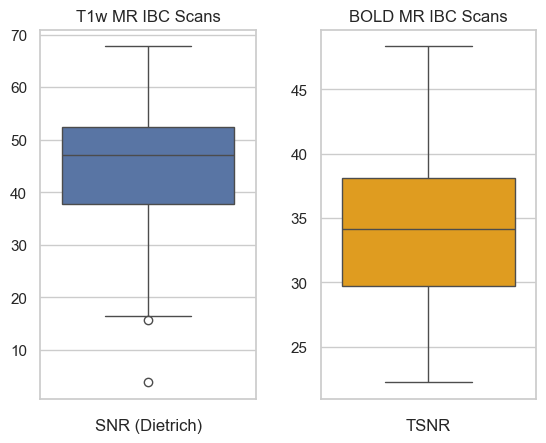

In [14]:
# Create combined graphs
sns.set_theme(style="whitegrid")

plt.subplot(1, 2, 1)
sns.boxplot(data=t1w, y="snrd_total", orient="v")
plt.ylabel("")
plt.xlabel("SNR (Dietrich)")
plt.title("T1w MR IBC Scans")

plt.subplot(1, 2, 2)
sns.boxplot(data=bold, y="tsnr", orient="v", color = "orange")
plt.ylabel("")
plt.xlabel("TSNR")
plt.title("BOLD MR IBC Scans")

plt.subplots_adjust(wspace=0.3)
plt.savefig("Y3_MRIQC_IBC_plot_1_3.8.24.png")
plt.show()

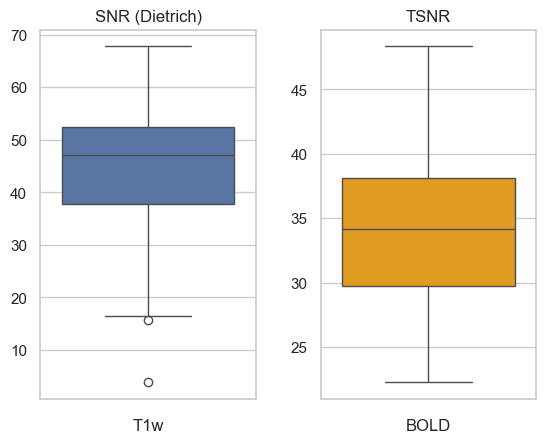

In [15]:
# Combined graph with different lables
sns.set_theme(style="whitegrid")

plt.subplot(1, 2, 1)
sns.boxplot(data=t1w, y="snrd_total", orient="v")
plt.ylabel("")
plt.xlabel("T1w")
plt.title("SNR (Dietrich)")

plt.subplot(1, 2, 2)
sns.boxplot(data=bold, y="tsnr", orient="v", color = "orange")
plt.ylabel("")
plt.xlabel("BOLD")
plt.title("TSNR")

plt.subplots_adjust(wspace=0.3)
plt.savefig("Y3_MRIQC_IBC_plot_2_3.8.24.png")
plt.show()